In [1]:
import sys
import numpy as np
import pandas as pd
import random

#sys.path.append('/home/olya/TUM/DESMOND/DESMOND2/')
from run_unpast import run

from utils.method import prepare_input_matrix, make_consensus_biclusters, write_bic_table, read_bic_table

### Input and output

In [2]:
exprs_file = "test_data_TCGA200/TCGA_200.exprs_z.tsv" # input .tsv file; features in rows, samples in columns
exprs = pd.read_csv(exprs_file,sep = "\t",index_col=0)
basename = 'TCGA200' # output prefix
out_dir = "test_results/" # output folder

### Running UnPaSt five times

* biclusters from individual runs:

\<basename>.seed=\<seed>.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


In [3]:
n_runs = 5
seeds = []
cseed = 0
random.seed(cseed)
for i in range(n_runs):
    seeds.append(random.randint(0,1000000))
print("generate ",n_runs," seeds",seeds)

generate  5  seeds [885440, 403958, 794772, 933488, 441001]


In [4]:
biclusters = []
for seed in seeds:
    # find and save biclusters
    results = run(exprs_file, basename,
                          out_dir=out_dir,
                          save=True, load=True,
                          # optional: show distributions of listed features after binarization
                          # show_fits = ["SEZ6","SYP","ESR1","ERBB2","FOXA1","PTH2R"], 
                          seed = seed,
                          verbose = True)
    results.index = ["seed="+str(seed)+"_"+str(x) for x in results.index.values ]
    biclusters.append(results)


Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from test_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarized.tsv 



Input is standardized.


Load statistics from test_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarization_stats.tsv 

Loaded background distribution from test_results/TCGA200.seed=885440.n=10000.min_ns=5.background.tsv 

		UP-regulated features:	849
		DOWN-regulated features:	360
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=885440.DOWN.tmpWGCNA_24.08.27_00:47:10.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=885440.DOWN.tmpWGCNA_24.08.27_00:47:10.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 14.59 s.
	modules: 30, not clustered features 31 
		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=885440.UP.tmpWGCNA_24.08.27_00:47:25.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=885440.UP.tmpWGCNA_24.08.27_00:47:25.t

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.58 s.
	modules: 87, not clustered features 313 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 117 features computed in 0.06 s.
No biclusters to merge
test_results/TCGA200.seed=885440.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 41.34 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from test_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarized.tsv 



Input is standardized.


Load statistics from test_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarization_stats.tsv 

Loaded background distribution from test_results/TCGA200.seed=403958.n=10000.min_ns=5.background.tsv 

		UP-regulated features:	858
		DOWN-regulated features:	365
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=403958.DOWN.tmpWGCNA_24.08.27_00:47:52.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=403958.DOWN.tmpWGCNA_24.08.27_00:47:52.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 10.95 s.
	modules: 35, not clustered features 28 
		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=403958.UP.tmpWGCNA_24.08.27_00:48:03.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=403958.UP.tmpWGCNA_24.08.27_00:48:03.t

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.08 s.
	modules: 111, not clustered features 147 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 146 features computed in 0.11 s.
No biclusters to merge
test_results/TCGA200.seed=403958.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 37.87 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from test_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarized.tsv 



Input is standardized.


Load statistics from test_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarization_stats.tsv 

Loaded background distribution from test_results/TCGA200.seed=794772.n=10000.min_ns=5.background.tsv 

		UP-regulated features:	852
		DOWN-regulated features:	360
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=794772.DOWN.tmpWGCNA_24.08.27_00:48:29.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=794772.DOWN.tmpWGCNA_24.08.27_00:48:29.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 13.89 s.
	modules: 21, not clustered features 45 
		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=794772.UP.tmpWGCNA_24.08.27_00:48:43.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=794772.UP.tmpWGCNA_24.08.27_00:48:43.t

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 13.70 s.
	modules: 114, not clustered features 136 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 135 features computed in 0.09 s.
No biclusters to merge
test_results/TCGA200.seed=794772.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 37.78 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from test_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarized.tsv 



Input is standardized.


Load statistics from test_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarization_stats.tsv 

Loaded background distribution from test_results/TCGA200.seed=933488.n=10000.min_ns=5.background.tsv 

		UP-regulated features:	860
		DOWN-regulated features:	377
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=933488.DOWN.tmpWGCNA_24.08.27_00:49:08.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=933488.DOWN.tmpWGCNA_24.08.27_00:49:08.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 14.30 s.
	modules: 20, not clustered features 218 
		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=933488.UP.tmpWGCNA_24.08.27_00:49:22.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=933488.UP.tmpWGCNA_24.08.27_00:49:22.

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.51 s.
	modules: 98, not clustered features 101 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 118 features computed in 0.07 s.
No biclusters to merge
test_results/TCGA200.seed=933488.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 42.07 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from test_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarized.tsv 



Input is standardized.


Load statistics from test_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarization_stats.tsv 

Loaded background distribution from test_results/TCGA200.seed=441001.n=10000.min_ns=5.background.tsv 

		UP-regulated features:	840
		DOWN-regulated features:	358
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=441001.DOWN.tmpWGCNA_24.08.27_00:49:48.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=441001.DOWN.tmpWGCNA_24.08.27_00:49:48.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 14.37 s.
	modules: 33, not clustered features 55 
		WGCNA pre-clustering: True
	Running WGCNA for test_results/TCGA200.kmeans.pval=0.01.seed=441001.UP.tmpWGCNA_24.08.27_00:50:03.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R test_results/TCGA200.kmeans.pval=0.01.seed=441001.UP.tmpWGCNA_24.08.27_00:50:03.t

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 15.84 s.
	modules: 91, not clustered features 103 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 124 features computed in 0.09 s.
No biclusters to merge
test_results/TCGA200.seed=441001.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 39.76 s


In [5]:
for i in range(len(biclusters)):
    print("seed=%s\tn_biclusters: %s"%(seeds[i], biclusters[i].shape[0]))

seed=885440	n_biclusters: 117
seed=403958	n_biclusters: 146
seed=794772	n_biclusters: 135
seed=933488	n_biclusters: 118
seed=441001	n_biclusters: 124


### Consensus biclusters from 5 runs

* consensus biclusters:

TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


Standardized expressions will be limited to [-3,3]:


Input is standardized.


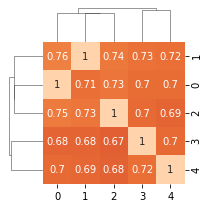

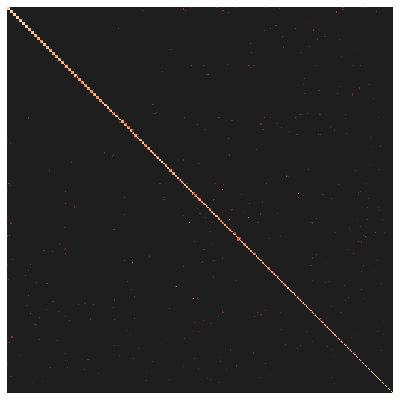

24 s for similarity matrix
	Running Louvain ...
		modularity: potts
	curve type: increasing


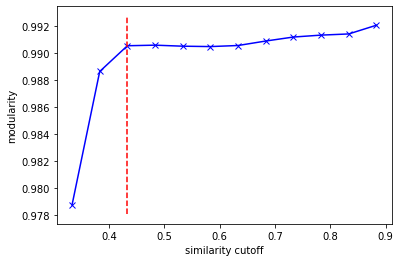

	Louvain runtime: modules detected in 0.61 s.
	modules: 141, not clustered features 74 
		similarity cutoff: 0.43 modularity: 0.991
all consensus biclusters: 220
detected 2+ times:136
4 s for making consensus biclusters from consensus gene sets


,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
0,2.922866,155,36,"{TTC6, FBP1, STRA8, XBP1, MAGEB4, FAM19A4, TEX...","{TCGA-E9-A244-01, TCGA-A2-A0T0-01, TCGA-E2-A1L...","{STRA8, MAGEB4, FAM19A4, TEX15, ONECUT2, FOXD1...","{TTC6, FBP1, XBP1, CAPN13, GATA3, SLC44A4, CYP...","{9729, 12290, 3077, 1553, 11795, 2068, 6677, 1...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,7,"{seed=403958_0, seed=441001_2, seed=441001_0, ..."
1,2.763514,2,14,"{LUC7L2, ISY1-RAB43}","{TCGA-AN-A0FT-01, TCGA-AO-A125-01, TCGA-E9-A6H...",{},"{LUC7L2, ISY1-RAB43}","{6282, 7263}","{193, 69, 70, 166, 168, 110, 19, 52, 179, 86, ...",DOWN,2,"{seed=933488_1, seed=885440_26}"
2,2.674523,7,24,"{EN1, IGSF23, DMRT1, PAPL, KRT9, NCAN, TLX3}","{TCGA-E9-A244-01, TCGA-A2-A0T0-01, TCGA-E2-A1L...","{EN1, IGSF23, DMRT1, PAPL, KRT9, NCAN, TLX3}",{},"{6080, 8261, 12997, 6792, 4019, 9012, 3546}","{131, 7, 139, 12, 13, 145, 19, 147, 157, 36, 1...",UP,7,"{seed=885440_6, seed=403958_12, seed=794772_4,..."
3,2.472176,139,47,"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{TCGA-BH-A0AW-01, TCGA-E9-A244-01, TCGA-A2-A0T...",{},"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{3596, 1529, 5647, 11795, 13331, 4117, 20, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=403958_2, seed=885440_1, seed=441001_3, ..."
4,2.34625,2,19,"{PRR27, ODAM}","{TCGA-EW-A1IZ-01, TCGA-E2-A1LS-01, TCGA-BH-A0W...","{PRR27, ODAM}",{},"{8819, 9996}","{2, 4, 139, 19, 22, 24, 165, 166, 48, 183, 58,...",UP,3,"{seed=794772_5, seed=403958_5, seed=885440_15}"
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.380035,4,98,"{GSPT2, ZBED9, WDR64, ARSH}","{TCGA-D8-A1XQ-01, TCGA-E2-A154-01, TCGA-GM-A2D...",{},"{ARSH, ZBED9, WDR64, GSPT2}","{14392, 916, 5437, 14207}","{0, 3, 4, 7, 10, 13, 15, 17, 18, 19, 20, 21, 2...",DOWN,4,"{seed=441001_92, seed=403958_129, seed=885440_..."
132,1.366281,9,85,"{FAM218A, LHFPL5, VANGL2, GLB1L2, ZNF667, SULT...","{TCGA-BH-A0AW-01, TCGA-E2-A154-01, TCGA-A7-A3I...",{},"{FAM218A, LHFPL5, VANGL2, GLB1L2, ZNF667, SULT...","{14025, 12490, 5355, 12782, 10832, 14839, 4408...","{0, 3, 4, 5, 10, 17, 18, 21, 24, 26, 28, 29, 3...",DOWN,4,"{seed=794772_112, seed=885440_106, seed=403958..."
133,1.345161,2,47,"{SERTAD4, SHISA9}","{TCGA-E2-A2P6-01, TCGA-EW-A1IZ-01, TCGA-E9-A24...",{},"{SERTAD4, SHISA9}","{11372, 11501}","{0, 128, 2, 3, 130, 5, 6, 7, 135, 136, 12, 144...",DOWN,2,"{seed=885440_107, seed=403958_141}"
134,1.319914,3,47,"{CARTPT, CHGB, SPAG6}","{TCGA-AN-A0FT-01, TCGA-AC-A2FG-01, TCGA-B6-A0X...","{CARTPT, CHGB, SPAG6}",{},"{1875, 12124, 2491}","{0, 1, 2, 5, 134, 9, 15, 144, 148, 21, 23, 24,...",UP,2,"{seed=403958_139, seed=794772_128}"


In [6]:
# filter and z-score transform input matrix, limit z-scores to [-3,3]
exprs_z = prepare_input_matrix(exprs, min_n_samples=5,ceiling=3)
consensus_biclusters = make_consensus_biclusters(biclusters, exprs_z, 
                                                      seed = cseed,
                                                      verbose = True,
                                                      plot = True)

consensus_biclusters

In [14]:
# save consensus biclusters
outfile = out_dir+basename+".consensus_seed="+str(cseed)+".bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv"
write_bic_table(consensus_biclusters,outfile)
outfile

'test_results/TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv'

# Example biclusters 

In [7]:
g = "ERBB2"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
34,1.708024,15,20,"{NEU4, UGT2B10, DMRTC2, NXPH1, SERHL2, TGM4, P...","{TCGA-AN-A0FT-01, TCGA-BH-A0AW-01, TCGA-EW-A2F...","{NEU4, UGT2B10, DMRTC2, NXPH1, SERHL2, TGM4, P...",{},"{3552, 10075, 14946, 11338, 12875, 12074, 9294...","{129, 132, 134, 149, 28, 29, 39, 46, 47, 54, 6...",UP,5,"{seed=794772_19, seed=885440_14, seed=441001_3..."


In [8]:
g = "ESR1"
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
3,2.472176,139,47,"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{TCGA-BH-A0AW-01, TCGA-E9-A244-01, TCGA-A2-A0T...",{},"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{3596, 1529, 5647, 11795, 13331, 4117, 20, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=403958_2, seed=885440_1, seed=441001_3, ..."


In [9]:
g = "FOXA1"
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
0,2.922866,155,36,"{TTC6, FBP1, STRA8, XBP1, MAGEB4, FAM19A4, TEX...","{TCGA-E9-A244-01, TCGA-A2-A0T0-01, TCGA-E2-A1L...","{STRA8, MAGEB4, FAM19A4, TEX15, ONECUT2, FOXD1...","{TTC6, FBP1, XBP1, CAPN13, GATA3, SLC44A4, CYP...","{9729, 12290, 3077, 1553, 11795, 2068, 6677, 1...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,7,"{seed=403958_0, seed=441001_2, seed=441001_0, ..."
3,2.472176,139,47,"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{TCGA-BH-A0AW-01, TCGA-E9-A244-01, TCGA-A2-A0T...",{},"{TTC6, FBP1, AKR7A3, XBP1, RABEP1, CELSR1, LMX...","{3596, 1529, 5647, 11795, 13331, 4117, 20, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=403958_2, seed=885440_1, seed=441001_3, ..."


In [11]:
g = "SEZ6"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
28,1.734242,10,17,"{KCNH6, PCSK2, SEZ6, CPLX2, CARTPT, LIN28A, SY...","{TCGA-B6-A40C-01, TCGA-D8-A1XU-01, TCGA-AN-A0F...","{KCNH6, PCSK2, SEZ6, CPLX2, CARTPT, LIN28A, SY...",{},"{11392, 2913, 12579, 6442, 12523, 1875, 9140, ...","{33, 98, 35, 162, 134, 103, 168, 77, 17, 177, ...",UP,5,"{seed=885440_9, seed=933488_13, seed=403958_8,..."
29,1.732302,3,25,"{KCNH6, AMER3, SEZ6}","{TCGA-E2-A56Z-01, TCGA-B6-A0IG-01, TCGA-B6-A0I...","{KCNH6, AMER3, SEZ6}",{},"{11392, 6442, 534}","{1, 130, 17, 20, 21, 150, 23, 151, 31, 33, 162...",UP,3,"{seed=794772_68, seed=885440_87, seed=403958_24}"


In [19]:
from utils.figs import draw_heatmap2
from utils.method import zscore

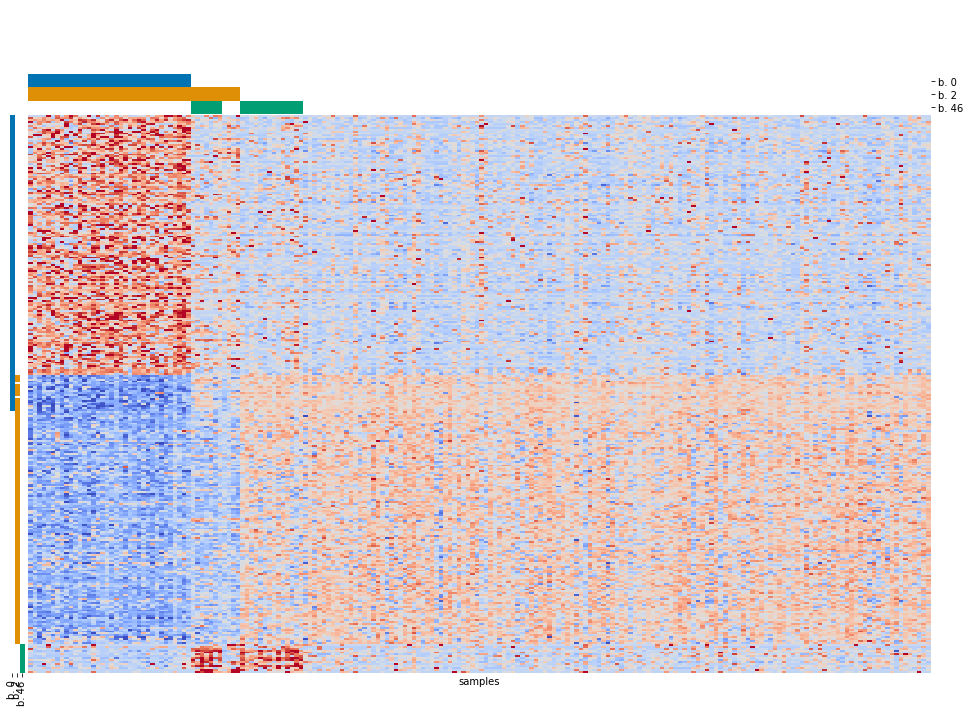

In [21]:
i = [0,,46]
b = consensus_biclusters.loc[i,:]


tmp = draw_heatmap2(exprs_z ,b,
              bicluster_colors="auto",#["magenta","orange","darkgreen","lightgreen"],
              figsize = (15,10), 
              dendrogram_ratio=(0.1,0.1), 
              bic_prefix = "b. ",
              no_legend=True,no_cbar=True,
              col_labels = False,
              row_labels = False,
                no_row_colors = False,cluster_rows=False
             )

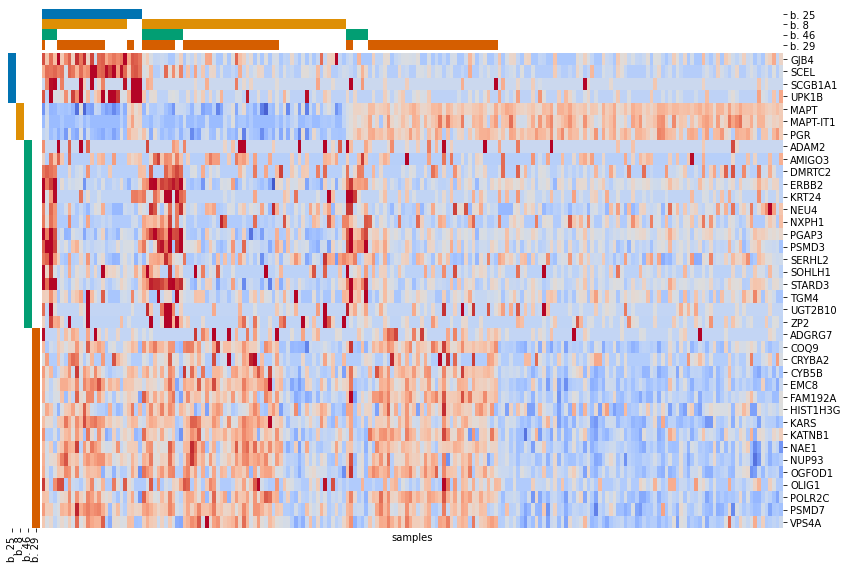

In [22]:
i = [25,8,46,29]
b = consensus_biclusters.loc[i,:]


tmp = draw_heatmap2(exprs_z ,b,
              bicluster_colors="auto",#["magenta","orange","darkgreen","lightgreen"],
              figsize = (12,8), 
              colors_ratio=(0.01,0.02), 
              bic_prefix = "b. ",
              no_legend=True,no_cbar=True,
              col_labels = False,
              row_labels = True,
                no_row_colors = False,cluster_rows=False
             )

In [19]:
#consensus_biclusters.loc[consensus_biclusters["direction"]=="DOWN",:]